In [617]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [618]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.9.1


In [619]:
dataset = pd.read_csv('data/only2_big_with_sf.csv')
dataset.set_index('cell_line', inplace=True)
dataset.head()

,7105,8813,57147,55732,2268,3075,2519,2729,4800,90529,...,8336,84311,126661,79447,283521,29122,9997,388963,6905,SF
cell_line,,,,,,,,,,,,,,,,,,,,,
NCIH1568-2,5.626439,6.855242,2.185867,4.079805,0.084064,0.176323,6.824513,4.956521,3.766595,2.298658,...,0.622930,5.373996,1.956057,5.482203,0.422233,0.176323,0.918386,1.778209,4.050502,0.607940
SCC9-2,3.964399,5.718088,2.260026,3.451541,0.084064,0.782409,6.039796,5.778734,4.903038,2.711495,...,1.536053,5.042207,2.344828,3.937344,0.000000,0.042644,2.475085,1.176323,4.174726,0.573035
HCC1428-2,4.002703,5.870365,3.621759,3.861955,0.014355,0.485427,4.614121,5.286881,4.429616,3.442280,...,3.033863,4.539159,1.970854,5.895303,0.622930,0.014355,0.918386,2.244887,5.555816,0.450188
U2OS-2,5.098453,6.543496,2.117695,4.115200,0.014355,0.432959,5.684258,4.847997,5.108524,2.189034,...,0.176323,5.028569,2.967169,4.995937,0.111031,0.042644,2.010780,1.925999,4.635754,0.526517
LU99-2,3.665620,6.716717,2.100978,4.176323,0.000000,1.263034,6.124948,4.395063,5.070389,2.669027,...,1.321928,6.613679,1.438293,4.349082,0.000000,0.111031,1.111031,1.632268,5.197315,0.625161


In [620]:
train_dataset = dataset.sample(frac=0.7, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

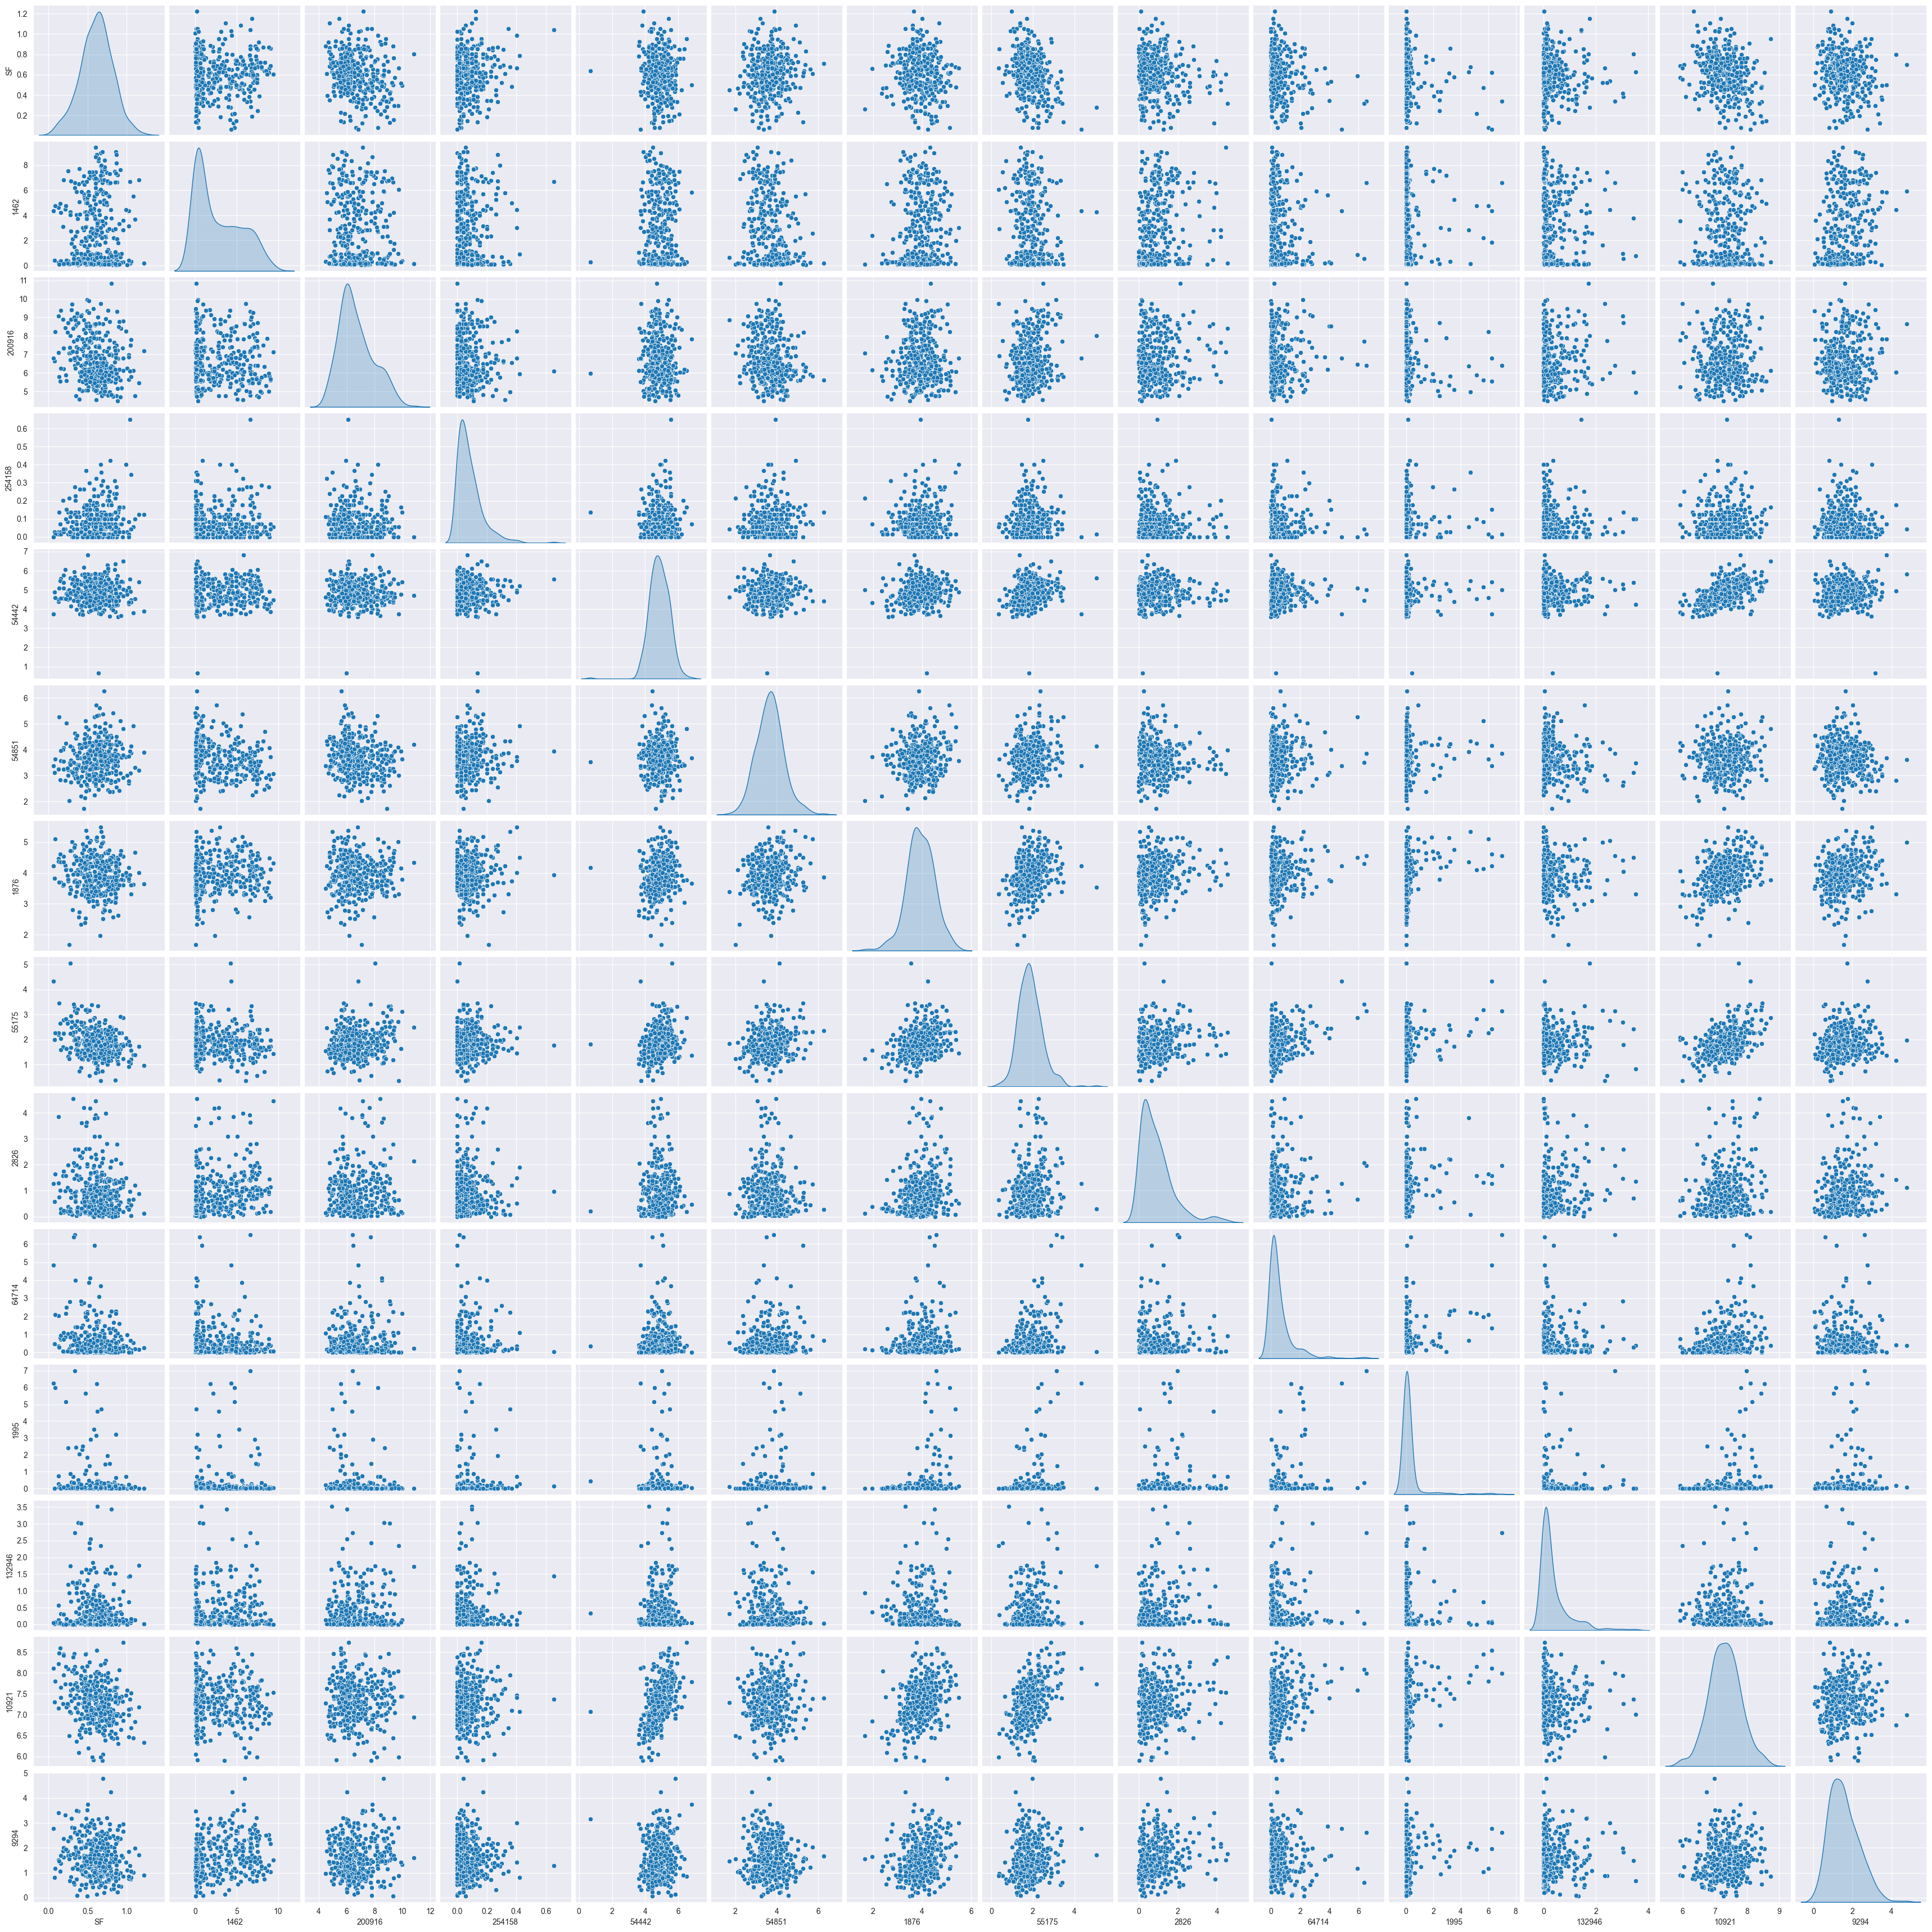

In [621]:
sns.pairplot(train_dataset[['SF', '1462', '200916', '254158', '54442', '54851', '1876', '55175', '2826', '64714', '1995', '132946', '10921', '9294']], diag_kind='kde')

In [622]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
7105,368.0,4.453615,1.070585,0.124328,3.885573,4.557343,5.085650,7.465648
8813,368.0,6.451206,0.550152,4.897724,6.080177,6.454666,6.784177,8.061074
57147,368.0,2.337234,0.519903,1.201634,1.970854,2.297191,2.615887,4.760753
55732,368.0,3.748433,0.639737,1.604071,3.370164,3.827819,4.142407,5.634593
2268,368.0,0.109189,0.243671,0.000000,0.014355,0.042644,0.097611,3.300124
...,...,...,...,...,...,...,...,...
29122,368.0,0.106602,0.273755,0.000000,0.000000,0.014355,0.070389,2.627607
9997,368.0,1.523477,0.692145,0.000000,1.049631,1.503329,1.972689,5.099295
388963,368.0,1.487239,0.758474,0.042644,0.895303,1.440950,1.960675,3.926948
6905,368.0,4.805715,0.580644,3.155425,4.454833,4.812241,5.194560,6.524816


In [623]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('SF')
test_labels = test_features.pop('SF')

In [624]:
# train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
7105,4.453615,1.070585
8813,6.451206,0.550152
57147,2.337234,0.519903
55732,3.748433,0.639737
2268,0.109189,0.243671
...,...,...
29122,0.106602,0.273755
9997,1.523477,0.692145
388963,1.487239,0.758474
6905,4.805715,0.580644


In [625]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [626]:
print(normalizer.mean.numpy())

[[4.454 6.451 2.337 ... 1.523 1.487 4.806]]


In [627]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[5.24 6.87 1.94 ... 1.86 0.46 3.27]]

Normalized: [[ 0.73  0.76 -0.76 ...  0.49 -1.35 -2.66]]


In [628]:
SF = np.array(train_features[
                  ['1462', '200916', '254158', '54442', '54851', '1876', '55175', '2826', '64714', '1995', '132946',
                   '10921', '9294']])
SF_norm = layers.Normalization(input_shape=[13, ], axis=None)

SF_norm.adapt(SF)



In [629]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1,)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam())
  return model

In [630]:
dnn_SF_model = build_and_compile_model(SF_norm)

In [631]:
dnn_SF_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_28 (Normaliza  (None, 13)               3         
 tion)                                                           
                                                                 
 dense_57 (Dense)            (None, 64)                896       
                                                                 
 dense_58 (Dense)            (None, 64)                4160      
                                                                 
 dense_59 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,124
Trainable params: 5,121
Non-trainable params: 3
_________________________________________________________________


In [632]:
%%time
history = dnn_SF_model.fit(
    train_features[['1462', '200916', '254158', '54442', '54851', '1876', '55175', '2826', '64714', '1995', '132946',
                   '10921', '9294']],
    train_labels,
    validation_split=0.1,
    verbose=0, epochs=300)

CPU times: total: 14.8 s
Wall time: 10.2 s


In [633]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

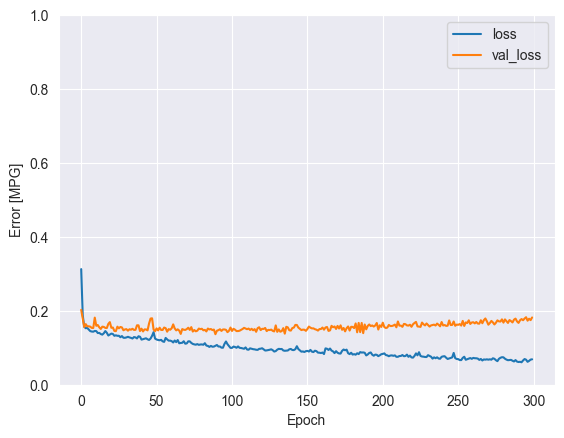

In [634]:
plot_loss(history)

In [635]:
def plot_horsepower(x, y):
  plt.scatter(train_features[['1462', '200916', '254158', '54442', '54851', '1876', '55175', '2826', '64714', '1995', '132946',
                   '10921', '9294']], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

In [636]:
x_test = test_features[['1462', '200916', '254158', '54442', '54851', '1876', '55175', '2826', '64714', '1995', '132946',
                   '10921', '9294']]
y_test = dnn_SF_model.predict(x_test)
# print(x_test.shape)
# print(y_test.shape)

5/5 [==============================] - 0s 2ms/step


In [637]:
x_test.head()

,1462,200916,254158,54442,54851,1876,55175,2826,64714,1995,132946,10921,9294
cell_line,,,,,,,,,,,,,
NCIH1568-2,0.070389,6.222264,0.163499,4.599318,4.646739,4.450881,2.084064,0.250962,1.117695,0.014355,0.000000,7.522542,1.855990
NCIH2291-2,0.495695,5.682573,0.084064,5.968782,2.857981,3.890447,2.211012,3.952334,0.097611,0.028569,1.627607,7.807548,1.632268
HCC1438-2,0.815575,7.079805,0.042644,5.112700,3.649615,4.985045,2.319040,2.124328,0.056584,0.000000,0.028569,7.617945,1.863938
OVMANA-2,7.476220,5.287251,0.000000,2.648465,3.198494,2.477677,0.739848,2.477677,1.929791,0.000000,0.000000,4.974070,0.773996
HS729-2,6.809672,6.283922,0.000000,4.853497,3.900142,3.347666,2.257011,2.847997,0.333424,0.042644,1.144046,7.265849,3.329124


In [638]:
# print(y_test.tolist())

In [639]:
new_y = []
for i in range(len(y_test)):
    new_y.append(y_test[i][0])
#     print(y_test[i])
# print(new_y)

In [640]:
# print(test_labels.values.shape[0], len(new_y))
# print(test_labels.values.tolist())
# print(new_y)

In [641]:
df = pd.DataFrame()
df['SF_labels'] = test_labels.values.tolist()
df['SF_pred'] = new_y
df.to_csv('data/SF_pred_kerasDL.csv', index=False)
df.head()

,SF_labels,SF_pred
0,0.607940,0.387662
1,0.656893,0.317618
2,0.864685,0.457745
3,0.705803,0.628269
4,0.577927,0.495234


In [642]:
new_df = pd.read_csv('data/SF_pred_kerasDL.csv')
new_df.head()

,SF_labels,SF_pred
0,0.607940,0.387662
1,0.656893,0.317619
2,0.864685,0.457745
3,0.705803,0.628269
4,0.577927,0.495234


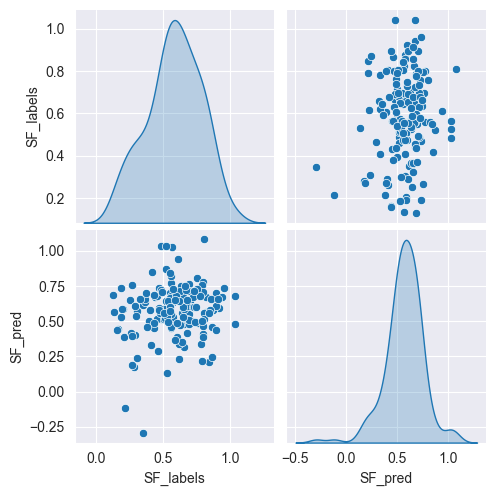

In [643]:
sns.pairplot(new_df[['SF_labels', 'SF_pred']], diag_kind='kde')

In [644]:
import scipy.stats as stats

predictions = new_df['SF_pred'].tolist()
print(predictions)
labels = new_df['SF_labels'].tolist()
print(labels)

[0.3876623, 0.3176185, 0.4577447, 0.62826926, 0.49523395, 0.44374907, 0.56329435, 0.23656303, 0.6700514, 0.56338614, 0.67553014, 0.5603364, 0.6975671, 0.70128393, -0.11502769, 0.43717295, 0.48179507, 0.5280986, 0.63586575, 0.5012407, -0.29342172, 0.38556224, 0.3367102, 0.4881097, 0.17296147, 0.7474654, 0.7720538, 0.80468, 0.5898009, 0.5775675, 0.21297884, 0.64130867, 0.3357127, 0.7620978, 0.6701141, 0.45037636, 0.6603828, 0.7756477, 0.50125575, 0.5615767, 1.0328798, 0.71710116, 0.35126042, 0.3318897, 0.5038112, 0.51480335, 0.56596655, 0.5744503, 0.68800265, 0.51623267, 0.54916793, 0.58748466, 0.2177693, 0.7558227, 0.5844118, 0.5835974, 0.67766535, 0.1348606, 0.5131714, 0.6358727, 0.6773165, 0.73934597, 0.50281537, 0.690293, 0.5561156, 0.94167674, 0.7149654, 0.6368611, 0.58884096, 0.70824254, 0.52868056, 0.48148346, 0.60573554, 0.6746327, 0.5963258, 0.40286696, 0.600957, 0.6040402, 0.7362214, 0.5148702, 0.6150778, 0.64820856, 0.6673276, 0.6713181, 0.82434493, 0.64077514, 0.6346809, 0.57

Slope: 0.1271467211909927
Intercept: 0.4946206539466914
R-Squared: 0.019161339304620006
P-Value: 0.08382215720236316
Standard Error: 0.07306765563828417


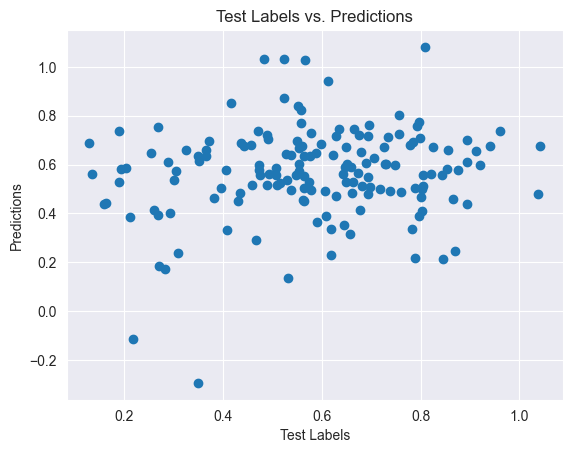

In [645]:
plt.plot(labels, predictions, 'o')
slope, intercept, r_value, p_value, std_err = stats.linregress(labels, predictions)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-Squared:", r_value**2)
print("P-Value:", p_value)
print("Standard Error:", std_err)
plt.xlabel('Test Labels')
plt.ylabel('Predictions')
plt.title('Test Labels vs. Predictions')
plt.show()

In [646]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(labels, predictions, squared=False)
print('rms:', rms)

rms: 0.25553044627716415
